## encoding_dim = 32  

In [ ]:
import numpy as np
import pandas as pd

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [ ]:
datas.shape

(1150, 4096)

In [ ]:
datas.max(), datas.min()

(6.825904, -6.292552000000001)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# 設置編碼維度
encoding_dim = 8  

# Autoencoder 結構
input_data = Input(shape=(4096,))
encoded = Dense(1024, activation='relu')(input_data)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(4096, activation='linear')(decoded)

# 建立 Autoencoder & Encoder
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# 編譯模型
autoencoder.compile(optimizer='adam', loss='mse')

# 創建 ModelCheckpoint 回調函數
checkpoint = ModelCheckpoint(
    'models/best_autoencoder.h5',  # 存檔名稱
    monitor='loss',         # 監測 loss（若有驗證集可用 'val_loss'）
    save_best_only=True,    # 只保存最好的模型
    mode='min',             # loss 越小越好
    verbose=1               # 顯示存檔信息
)

# 訓練模型
history = autoencoder.fit(
    datas, datas,
    epochs=1000,
    batch_size=32,
    shuffle=True,
    callbacks=[checkpoint]  # 加入回調函數
)

# 使用 encoder 提取特徵
features = encoder.predict(datas)
print("Encoded Features Shape:", features.shape)

Epoch 1/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.2079 
Epoch 1: loss improved from inf to 0.20809, saving model to models/best_autoencoder.h5
36/36 [==============================] - 2s 10ms/step - loss: 0.2081
Epoch 2/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.1997
Epoch 2: loss improved from 0.20809 to 0.19657, saving model to models/best_autoencoder.h5
36/36 [==============================] - 1s 17ms/step - loss: 0.1966
Epoch 3/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.1941
Epoch 3: loss improved from 0.19657 to 0.19355, saving model to models/best_autoencoder.h5
36/36 [==============================] - 1s 17ms/step - loss: 0.1935
Epoch 4/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.1850
Epoch 4: loss improved from 0.19355 to 0.18576, saving model to models/best_autoencoder.h5
36/36 [==============================] - 1s 18ms/step - loss: 0.1858
Epoch 5/1000
32/36 [=========================>....] - E

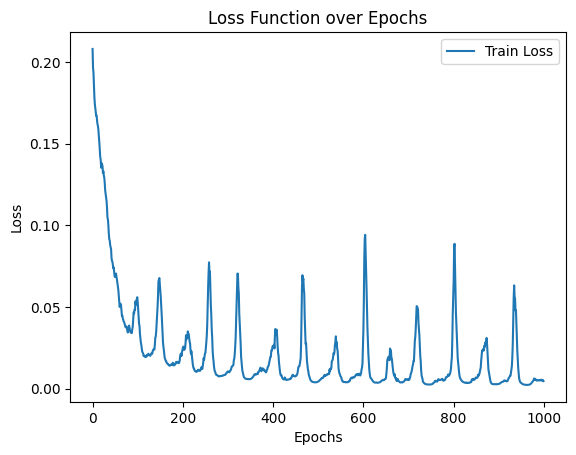

In [ ]:
import matplotlib.pyplot as plt
# 繪製 loss function
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function over Epochs')
plt.show()

In [ ]:
features.min(), features.max()

(-77.90471, 89.4199)

In [ ]:
features

array([[  0.37054855,  -0.13483311,   0.21474358, ...,   0.01617631,
         -2.3966784 ,   0.678371  ],
       [ -0.14314958,   0.02970225,   0.96421695, ...,  -0.50709486,
         -0.56365865,   0.37633044],
       [  0.12287337,  -0.0732574 ,  -1.29625   , ...,  -0.7643456 ,
         -1.5797937 ,  -1.9899808 ],
       ...,
       [ -6.103942  ,   1.9976205 ,   1.4390142 , ...,   8.408733  ,
         -0.5554938 , -11.667893  ],
       [  2.7585526 ,  -8.373889  ,  -4.4800615 , ...,  -2.9033172 ,
          2.133494  ,  -7.8191905 ],
       [ -1.5124856 ,   2.6798067 ,   1.1006948 , ...,   1.7116312 ,
          8.583164  ,  -3.5128179 ]], dtype=float32)

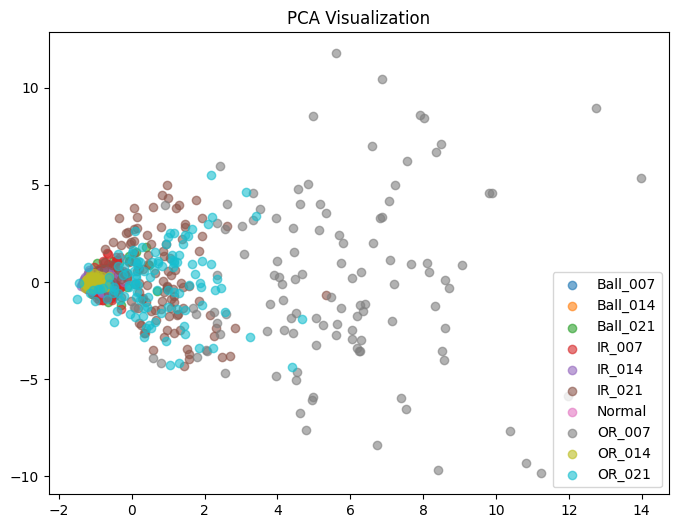

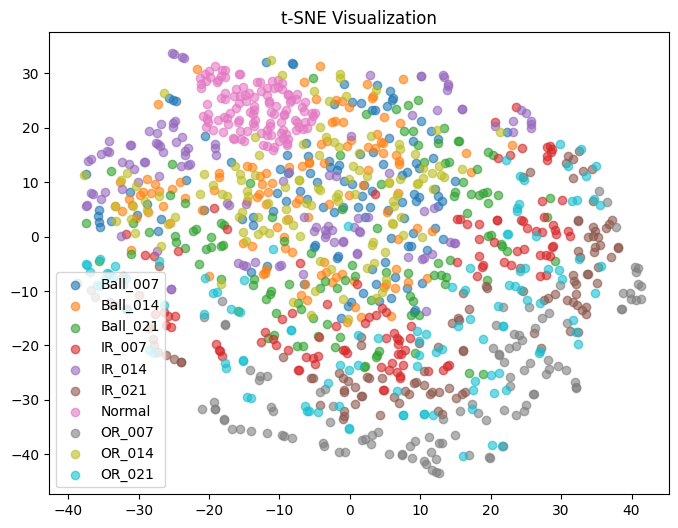

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
# datas = df.iloc[:, :-1]
# labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(features)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels, "t-SNE Visualization")

In [ ]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(features)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")

## encoding_dim = 10

In [1]:
import numpy as np
import pandas as pd

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [2]:
datas.shape

(1150, 4096)

In [3]:
datas.max(), datas.min()

(6.825904, -6.292552000000001)

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# 設置編碼維度
encoding_dim = 10

# Autoencoder 結構
input_data = Input(shape=(4096,))
encoded = Dense(1024, activation='relu')(input_data)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(4096, activation='linear')(decoded)

# 建立 Autoencoder & Encoder
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# 編譯模型
autoencoder.compile(optimizer='adam', loss='mse')

# 創建 ModelCheckpoint 回調函數
checkpoint = ModelCheckpoint(
    'models/best_autoencoder10.h5',  # 存檔名稱
    monitor='loss',         # 監測 loss（若有驗證集可用 'val_loss'）
    save_best_only=True,    # 只保存最好的模型
    mode='min',             # loss 越小越好
    verbose=1               # 顯示存檔信息
)

# 訓練模型
history = autoencoder.fit(
    datas, datas,
    epochs=1000,
    batch_size=32,
    shuffle=True,
    callbacks=[checkpoint]  # 加入回調函數
)

# 使用 encoder 提取特徵
features = encoder.predict(datas)
print("Encoded Features Shape:", features.shape)

2025-02-17 15:37:06.223364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-17 15:37:07.076843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-02-17 15:37:07.076962: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-02-17 15:37:07.076971: W tensorflow/compiler/tf2tensorrt/util

Epoch 1/1000


2025-02-17 15:37:10.528479: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fbf1401ba90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-02-17 15:37:10.528530: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): GRID P40-24Q, Compute Capability 6.1
2025-02-17 15:37:10.534532: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-17 15:37:10.668197: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/36 [========================>.....] - ETA: 0s - loss: 0.2052 
Epoch 1: loss improved from inf to 0.20567, saving model to models/best_autoencoder10.h5
36/36 [==============================] - 3s 10ms/step - loss: 0.2057
Epoch 2/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.1922
Epoch 2: loss improved from 0.20567 to 0.19755, saving model to models/best_autoencoder10.h5
36/36 [==============================] - 1s 21ms/step - loss: 0.1975
Epoch 3/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.1955
Epoch 3: loss improved from 0.19755 to 0.19307, saving model to models/best_autoencoder10.h5
36/36 [==============================] - 1s 21ms/step - loss: 0.1931
Epoch 4/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.1857
Epoch 4: loss improved from 0.19307 to 0.18752, saving model to models/best_autoencoder10.h5
36/36 [==============================] - 1s 19ms/step - loss: 0.1875
Epoch 5/1000
31/36 [========================>.....] - ETA: 0

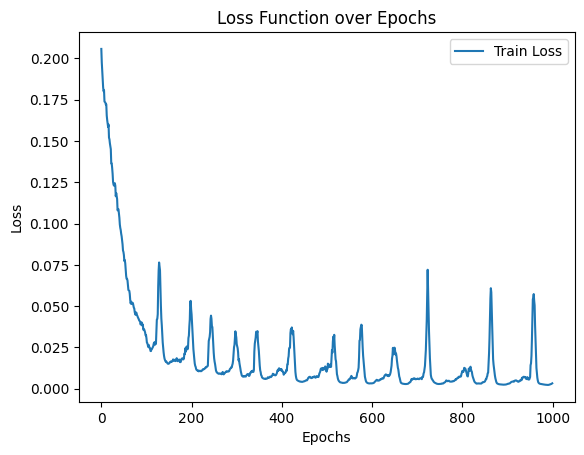

In [5]:
import matplotlib.pyplot as plt
# 繪製 loss function
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function over Epochs')
plt.show()

In [6]:
features.min(), features.max()

(-128.05959, 118.52277)

In [7]:
features

array([[  2.378413  ,  -0.41663325,  -0.28154606, ...,  -1.6393416 ,
         -2.8684464 ,  -0.24551761],
       [  2.5731087 ,   1.5020685 ,  -0.1964292 , ...,  -1.2553018 ,
          0.473332  ,   0.36521932],
       [  3.8839045 ,  -1.7334293 ,   1.0444751 , ...,   1.5480253 ,
         -5.91399   ,  -5.978083  ],
       ...,
       [ -5.591041  ,  17.42247   , -13.936477  , ...,  11.974508  ,
        -16.47727   , -15.314228  ],
       [ 12.395691  ,   1.7394097 ,   0.8632555 , ...,  12.880172  ,
         -5.7134523 , -11.292338  ],
       [  1.4946569 ,   7.526635  ,  -9.802164  , ...,  18.069588  ,
        -20.0226    , -26.099424  ]], dtype=float32)

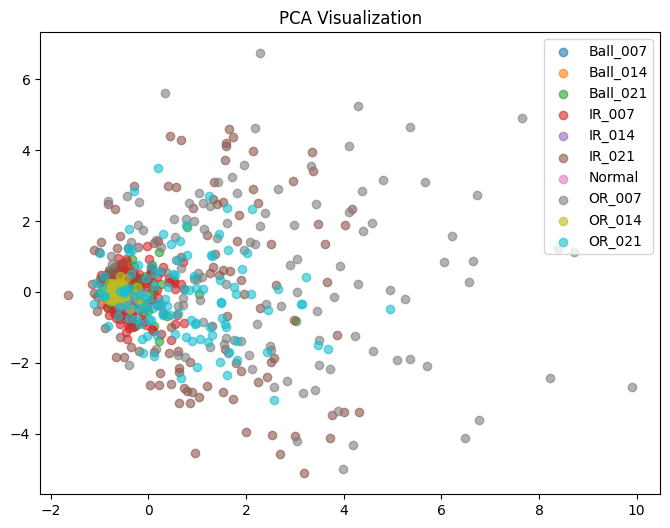

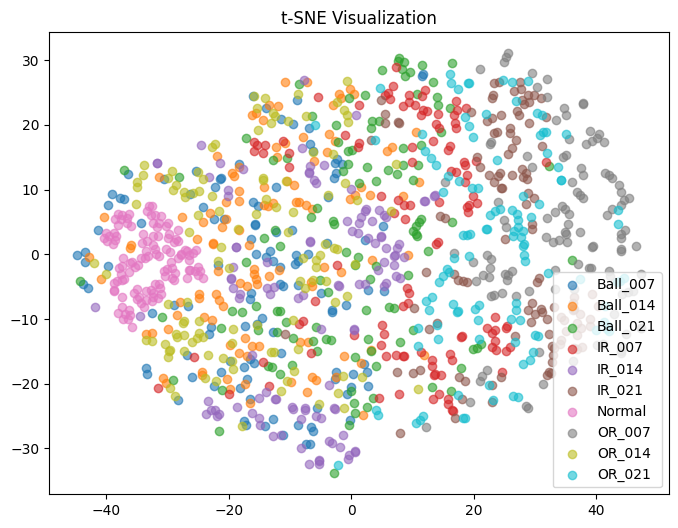

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
# datas = df.iloc[:, :-1]
# labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(features)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels, "t-SNE Visualization")

In [9]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(features)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")